Mean Squared Error: 0.1624


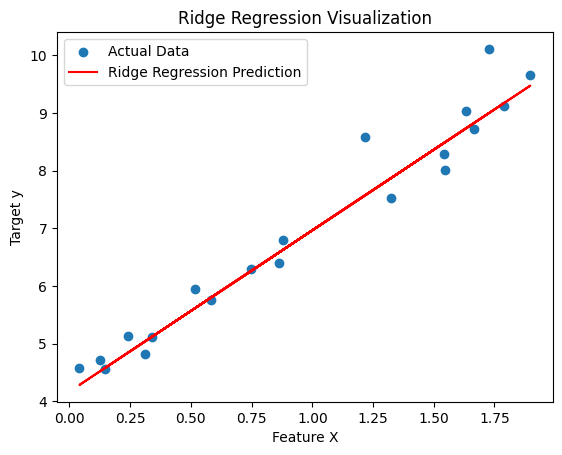

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1) * 0.5  # Linear relationship with noise

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Ridge Regression (L2 Regularization)
ridge_reg = Ridge(alpha=1.0)  # Alpha controls regularization strength
ridge_reg.fit(X_train, y_train)

# Predictions
y_pred = ridge_reg.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# Plot results
plt.scatter(X_test, y_test, label="Actual Data")
plt.plot(X_test, y_pred, color='red', label="Ridge Regression Prediction")
plt.xlabel("Feature X")
plt.ylabel("Target y")
plt.legend()
plt.title("Ridge Regression Visualization")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# Generate synthetic regression dataset
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Define the model
model = LinearRegression()

# Apply K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

# Print evaluation scores
print(f"Cross-Validation Scores: {scores}")
print(f"Mean R² Score: {scores.mean():.4f}")

# Visualizing data
plt.scatter(X, y, label="Data Points")
plt.xlabel("Feature X")
plt.ylabel("Target y")
plt.title("Synthetic Regression Dataset")
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Generate synthetic data
np.random.seed(42)
X1 = np.random.rand(100) * 10  # Feature 1: Random numbers
X2 = X1 + np.random.randn(100) * 0.5  # Feature 2: Correlated with X1
X3 = np.random.rand(100) * 5  # Feature 3: Random numbers
y = 3 * X1 + 2 * X3 + np.random.randn(100) * 1.5  # Target with noise

# Convert to DataFrame
data = pd.DataFrame({'Feature1': X1, 'Feature2': X2, 'Feature3': X3, 'Target': y})

# -------- DATA AUGMENTATION --------
# Adding synthetic noise to X1
data['Feature1_Augmented'] = data['Feature1'] + np.random.randn(100) * 0.2

# -------- FEATURE ENGINEERING --------
# Creating a new interaction feature
data['Feature_Interaction'] = data['Feature1'] * data['Feature3']

# -------- FEATURE SELECTION --------
X = data.drop(columns=['Target'])  # Select all features except target
y = data['Target']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use Recursive Feature Elimination (RFE) for feature selection
model = LinearRegression()
selector = RFE(model, n_features_to_select=3)  # Select top 3 features
selector.fit(X_train, y_train)

# Get selected features
selected_features = X_train.columns[selector.support_]
print("Selected Features:", selected_features)

# -------- PLOTTING --------
plt.scatter(data['Feature1'], data['Target'], label='Feature1 vs Target')
plt.scatter(data['Feature3'], data['Target'], label='Feature3 vs Target', color='red')
plt.xlabel("Features")
plt.ylabel("Target Variable")
plt.legend()
plt.title("Feature Relationship with Target")
plt.show()